**Pipeline**

In [1]:
# Import the necessary modules
from pyddeeg.classification.engine.trainer import train_model
from pyddeeg.classification.engine.validator import validate_model
from pyddeeg.classification.dataloaders import create_labeled_dataset
from pyddeeg.classification.models.window_model import create_model_config
from pyddeeg.classification.utils.strat_kfold import stratified_kfold

import os

# Set up paths
DATASET_ROOT = "/home/mario/Python/Datasets/EEG/timeseries/processed/rqa_windows/dataset"
OUTPUT_DIR = "/home/mario/Python/Datasets/EEG/timeseries/processed/rqa_windows/time_resolved_classification"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Define parameters
window = "window_200"
direction = "up"
electrode = "T7"
fold_index = 0

# Create folds
folds = stratified_kfold(root_path=DATASET_ROOT, n_splits=5, random_state=42, output_file=OUTPUT_DIR)

# Create dataset
dataset = create_labeled_dataset(
    dataset_root=DATASET_ROOT,
    window=window,
    direction=direction,
    electrode=electrode,
    fold_info=folds,
    fold_index=fold_index
)

# Print dataset summary
dataset.summary()

# Create model configuration
model_config = create_model_config(
    model_type="histogram_gbm",
    hyperparameters={
        "learning_rate": 0.1,
        "max_depth": 8,
        "random_state": 42,
        "model_name": f"eeg_gbm_{electrode}_f{window}_{direction}_fold{fold_index}"
    }
)

# Train the model
trained_model = train_model(
    dataset=dataset,
    model_config=model_config,
    save_model=True,
    output_dir=OUTPUT_DIR,
)

# Validate model
validation_metrics = validate_model(
    model=trained_model,
    dataset=dataset,
    output_dir=os.path.join(OUTPUT_DIR, "validation"),
    save_metrics=True,
    split="val"
    )

validation_metrics = validate_model(
    model=trained_model,
    dataset=dataset,
    output_dir=os.path.join(OUTPUT_DIR, "validation"),
    save_metrics=True,
    split="train"
    )

EEG Dataset Summary (Scikit-Learn Ready):
  Training data shape: (26481, 15)
  Testing data shape: (6790, 15)
  Training labels shape: (26481,)
  Testing labels shape: (6790,)
  Unique training labels: (array([0., 1.]), array([10185, 16296]))
  Unique testing labels: (array([0., 1.]), array([2716, 4074]))
  Metadata:
    window: window_200
    direction: up
    electrode: T7
    fold_index: 0
    dd_shape: (15, 15, 679)
    ct_shape: (34, 15, 679)
    n_metrics: 15
    n_timepoints: 679
    n_train_patients: 39
    n_test_patients: 10


Figure saved to /home/mario/Python/Datasets/EEG/timeseries/processed/rqa_windows/time_resolved_classification/figures/auc_roc_evolution_window_200_up_T7_fold0.png


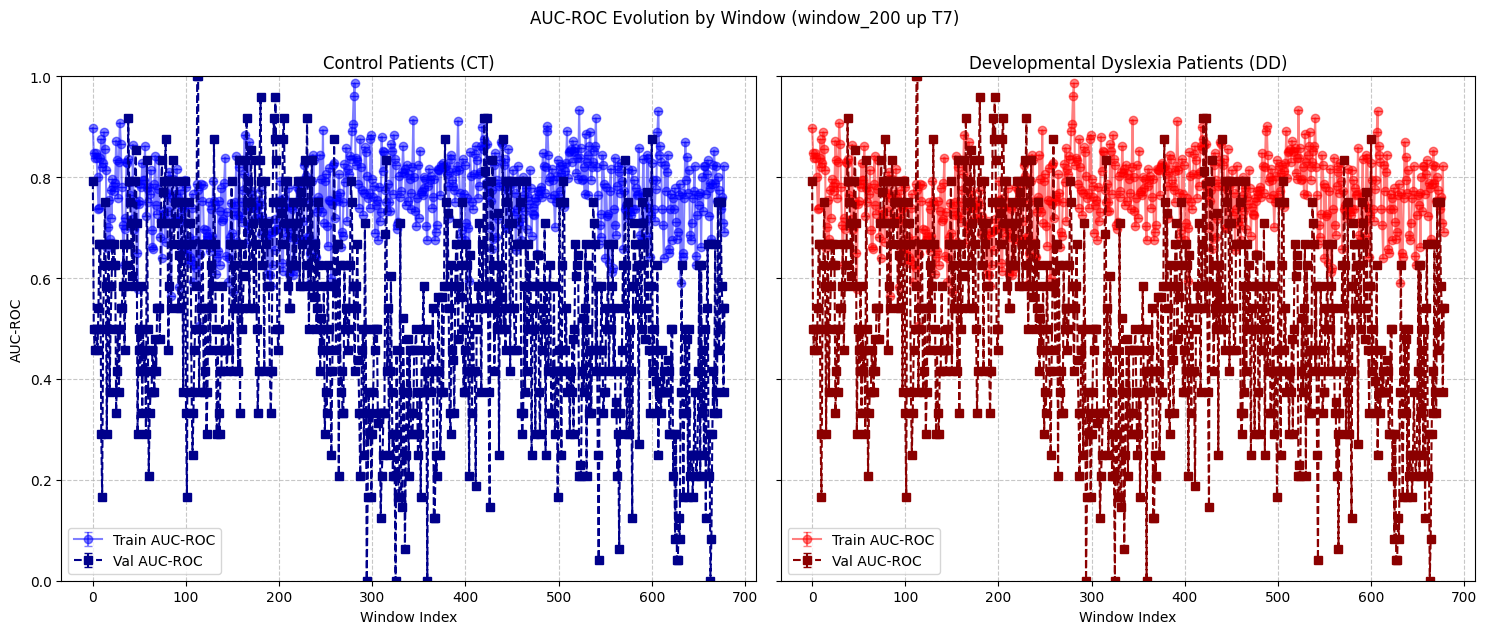

In [2]:
# Import the visualization module
from pyddeeg.classification.utils.auc_evolution import plot_auc_evolution
import os
# Set up paths
METRICS_DIR = os.path.join(OUTPUT_DIR, "validation")

# Plot ROC AUC evolution
roc_auc_fig = plot_auc_evolution(
    dataset=dataset,
    metrics_dir=METRICS_DIR,
    auc_type="ROC",
    save_fig=True,
    output_dir=os.path.join(OUTPUT_DIR, "figures")
)

